In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Exploratory Data Analysis**

In [7]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [15]:
# df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Tcon/skydata.csv")
df = pd.read_csv("/content/skydata.csv")

In [16]:
# df.head(10)
df

,dec,u,redshift,z,r,ra,run,specobjid,field,plate,camcol,g,objid,class,fiberid,rerun,i,mjd
0,2.803170,19.35065,0.142265,16.32664,17.04886,182.898466,1458,583309923396381000,388,518,4,17.89648,1237651736831980000,STAR,341,301,16.63305,52282
1,23.891666,17.57148,0.000032,15.88743,16.04065,270.240850,4832,2471445199432210000,126,2195,3,16.38217,1237666227497600000,GALAXY,345,301,15.92649,54234
2,14.323357,18.30611,0.073976,15.00599,15.73859,138.913885,5935,2742700762298610000,151,2436,4,16.52253,1237670965385040000,STAR,31,301,15.32356,54054
3,6.157200,19.52862,0.040765,16.13952,16.88640,159.998722,2986,1125959874568550000,276,1000,2,17.74360,1237658298460930000,STAR,218,301,16.48322,52643
4,-0.395033,18.91353,0.000084,17.14535,17.36865,181.624546,6793,363748710133295000,140,323,3,17.80134,1237674649929380000,GALAXY,302,301,17.21479,51615
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79995,58.093491,19.36814,0.102927,16.57812,17.29029,179.797354,2826,1477349224591940000,276,1312,5,18.03106,1237657612876780000,STAR,613,301,16.86924,52781
79996,2.612478,18.71973,0.000426,17.33746,17.49476,151.950921,1462,5334601264587360000,178,4738,5,17.78212,1237651754534960000,GALAXY,318,301,17.36612,55650
79997,29.385913,18.62474,0.057637,15.65200,16.30223,116.238594,2822,1000975639395720000,56,889,3,17.06923,1237657594608750000,STAR,184,301,15.92962,52663
79998,66.773361,18.04600,0.000060,15.79832,16.14084,117.910037,5060,3314804157889670000,167,2944,5,16.69588,1237667207826570000,GALAXY,563,301,15.91642,54523




*  **The dataset contains 80k instances with 17 features and all of them are numerical. The 18th column 'class' is the target i.e. dependent variable.**




In [17]:
# shift the target column 'class' to last position for better readability
target_column = df.pop('class')
df.insert( len(df.columns), 'class', target_column)
df

,dec,u,redshift,z,r,ra,run,specobjid,field,plate,camcol,g,objid,fiberid,rerun,i,mjd,class
0,2.803170,19.35065,0.142265,16.32664,17.04886,182.898466,1458,583309923396381000,388,518,4,17.89648,1237651736831980000,341,301,16.63305,52282,STAR
1,23.891666,17.57148,0.000032,15.88743,16.04065,270.240850,4832,2471445199432210000,126,2195,3,16.38217,1237666227497600000,345,301,15.92649,54234,GALAXY
2,14.323357,18.30611,0.073976,15.00599,15.73859,138.913885,5935,2742700762298610000,151,2436,4,16.52253,1237670965385040000,31,301,15.32356,54054,STAR
3,6.157200,19.52862,0.040765,16.13952,16.88640,159.998722,2986,1125959874568550000,276,1000,2,17.74360,1237658298460930000,218,301,16.48322,52643,STAR
4,-0.395033,18.91353,0.000084,17.14535,17.36865,181.624546,6793,363748710133295000,140,323,3,17.80134,1237674649929380000,302,301,17.21479,51615,GALAXY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79995,58.093491,19.36814,0.102927,16.57812,17.29029,179.797354,2826,1477349224591940000,276,1312,5,18.03106,1237657612876780000,613,301,16.86924,52781,STAR
79996,2.612478,18.71973,0.000426,17.33746,17.49476,151.950921,1462,5334601264587360000,178,4738,5,17.78212,1237651754534960000,318,301,17.36612,55650,GALAXY
79997,29.385913,18.62474,0.057637,15.65200,16.30223,116.238594,2822,1000975639395720000,56,889,3,17.06923,1237657594608750000,184,301,15.92962,52663,STAR
79998,66.773361,18.04600,0.000060,15.79832,16.14084,117.910037,5060,3314804157889670000,167,2944,5,16.69588,1237667207826570000,563,301,15.91642,54523,GALAXY


In [18]:
# Information about the columns of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   dec        80000 non-null  float64
 1   u          80000 non-null  float64
 2   redshift   80000 non-null  float64
 3   z          80000 non-null  float64
 4   r          80000 non-null  float64
 5   ra         80000 non-null  float64
 6   run        80000 non-null  int64  
 7   specobjid  80000 non-null  uint64 
 8   field      80000 non-null  int64  
 9   plate      80000 non-null  int64  
 10  camcol     80000 non-null  int64  
 11  g          80000 non-null  float64
 12  objid      80000 non-null  int64  
 13  fiberid    80000 non-null  int64  
 14  rerun      80000 non-null  int64  
 15  i          80000 non-null  float64
 16  mjd        80000 non-null  int64  
 17  class      80000 non-null  object 
dtypes: float64(8), int64(8), object(1), uint64(1)
memory usage: 11.0+ MB




*   **All columns except the target class are numeric type.**



In [19]:
# Numerical description about the dataset
df.describe()

,dec,u,redshift,z,r,ra,run,specobjid,field,plate,camcol,g,objid,fiberid,rerun,i,mjd
count,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,8.000000e+04,80000.000000,80000.000000,80000.000000,80000.000000,8.000000e+04,80000.000000,80000.0,80000.000000,80000.000000
mean,24.956199,18.599217,0.044789,16.249336,16.688952,177.743131,3959.174013,2.752467e+18,187.312775,2444.599575,3.275537,17.255286,1.237662e+18,336.434625,301.0,16.417453,53832.966075
std,20.684056,0.850213,0.053003,1.144420,1.013888,77.896889,1673.864207,2.247970e+18,141.263033,1996.584854,1.623022,0.906773,7.189191e+12,212.623680,0.0,1.074750,1441.947194
min,-19.495456,10.611810,-0.004136,8.947795,9.005167,0.013061,109.000000,2.994897e+17,11.000000,266.000000,1.000000,9.988000,1.237646e+18,1.000000,301.0,8.848403,51608.000000
25%,6.592120,18.151283,-0.000033,15.533245,16.112177,135.892460,2826.000000,1.334297e+18,85.000000,1185.000000,2.000000,16.763295,1.237658e+18,158.000000,301.0,15.781940,52731.000000
50%,23.710118,18.836250,0.033506,16.264470,16.754960,180.537028,3900.000000,2.319509e+18,153.000000,2060.000000,3.000000,17.414850,1.237662e+18,324.000000,301.0,16.453590,53712.000000
75%,40.306610,19.253073,0.078770,16.994713,17.392215,224.576979,5060.000000,3.221323e+18,249.000000,2861.000000,5.000000,17.907175,1.237667e+18,496.000000,301.0,17.129413,54567.000000
max,84.490494,19.599950,1.945427,29.383740,31.990100,359.973933,8162.000000,1.314852e+19,982.000000,11678.000000,6.000000,19.996050,1.237681e+18,1000.000000,301.0,32.101780,58543.000000


In [20]:
# Number of unique values in each column; just to analyze for visualization as the column with less number of unique values can be useful for 'hue' in catplots
for column in df.columns:
  print(column,":",len(df[column].unique()))

dec : 79999
u : 67083
redshift : 79427
z : 72211
r : 71044
ra : 79999
run : 510
specobjid : 80000
field : 837
plate : 5820
camcol : 6
g : 69684
objid : 56808
fiberid : 1000
rerun : 1
i : 71507
mjd : 2143
class : 2




*   **The dataset is a binary dataset as the total number of classes are two. Also, IDs are generally not used in Mcachine Modeling as it pushes the model more towards overfitting.Hence, from above we can remove the feature 'specobjid' as it is unique and categorical for 80k records and so a right candidate to be removed.**

* **Constant features are the type of features that contain only one value for all the outputs in the dataset.Constant features provide no information that can help in classification of the record at hand.Therefore, it is advisable to remove all the constant features from the dataset. Here the constant feature is 'rerun'.**

In [21]:
df.drop(["rerun", "specobjid"],  axis=1, inplace=True)

In [22]:
# Checking for missing values

df.isnull().sum().sort_values()

dec         0
u           0
redshift    0
z           0
r           0
ra          0
run         0
field       0
plate       0
camcol      0
g           0
objid       0
fiberid     0
i           0
mjd         0
class       0
dtype: int64

* **We can observe from the above results that there are no missing values in any of the columns, so we dont need to drop any of the rows or the columns.The dataframe is already clean and doesn't contain any null values.** 

In [23]:
# Converting the classes into binary- with Star as '0' and Galaxy as '1' so that an easy correlation can be found among all the features and target in a heatmap later
df['class'] = df['class'].astype('str')
df['class'].replace(['STAR', 'GALAXY'],['0', '1'], inplace=True)
df['class'] = df['class'].astype('int') 
df

,dec,u,redshift,z,r,ra,run,field,plate,camcol,g,objid,fiberid,i,mjd,class
0,2.803170,19.35065,0.142265,16.32664,17.04886,182.898466,1458,388,518,4,17.89648,1237651736831980000,341,16.63305,52282,0
1,23.891666,17.57148,0.000032,15.88743,16.04065,270.240850,4832,126,2195,3,16.38217,1237666227497600000,345,15.92649,54234,1
2,14.323357,18.30611,0.073976,15.00599,15.73859,138.913885,5935,151,2436,4,16.52253,1237670965385040000,31,15.32356,54054,0
3,6.157200,19.52862,0.040765,16.13952,16.88640,159.998722,2986,276,1000,2,17.74360,1237658298460930000,218,16.48322,52643,0
4,-0.395033,18.91353,0.000084,17.14535,17.36865,181.624546,6793,140,323,3,17.80134,1237674649929380000,302,17.21479,51615,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79995,58.093491,19.36814,0.102927,16.57812,17.29029,179.797354,2826,276,1312,5,18.03106,1237657612876780000,613,16.86924,52781,0
79996,2.612478,18.71973,0.000426,17.33746,17.49476,151.950921,1462,178,4738,5,17.78212,1237651754534960000,318,17.36612,55650,1
79997,29.385913,18.62474,0.057637,15.65200,16.30223,116.238594,2822,56,889,3,17.06923,1237657594608750000,184,15.92962,52663,0
79998,66.773361,18.04600,0.000060,15.79832,16.14084,117.910037,5060,167,2944,5,16.69588,1237667207826570000,563,15.91642,54523,1


# **Data Visualization**

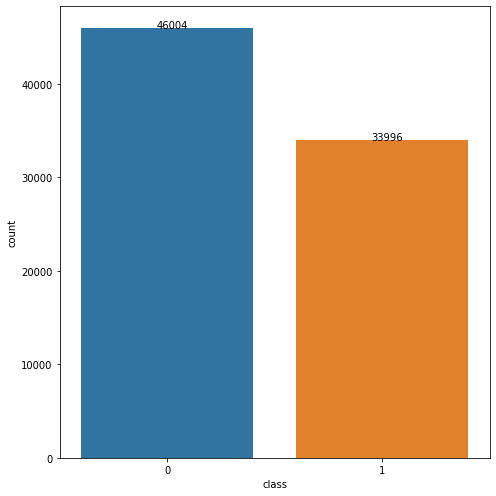

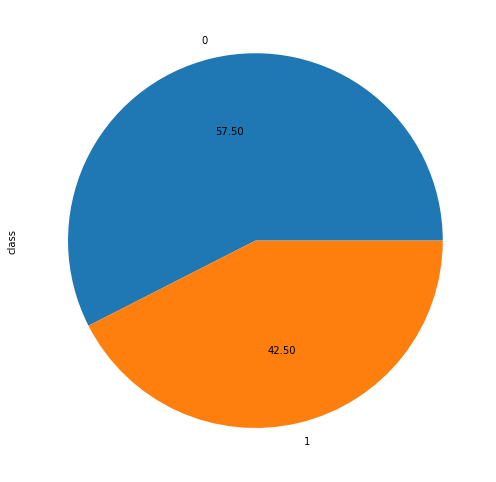

In [ ]:
# Let's see the target class counts which should sum up to 80k records in the dataset
plt.rcParams["figure.figsize"] = [7.00, 7]
plt.rcParams["figure.autolayout"] = True

ax = sns.countplot(x="class", data=df)
for p in ax.patches:
   ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.35, p.get_height()+0.1))

plt.show()

# Show pie plot (Approach 1)
df["class"].value_counts().plot.pie(autopct='%.2f')



*   **The dataset above is not very skewed or imbalanced- 46k records for *Star*(0) label and 34k records for *Galaxy*(1) label and hence there is no need need of applying methods like SMOTE or resampling (oversampling & undersampling) for balancing the dataset.**



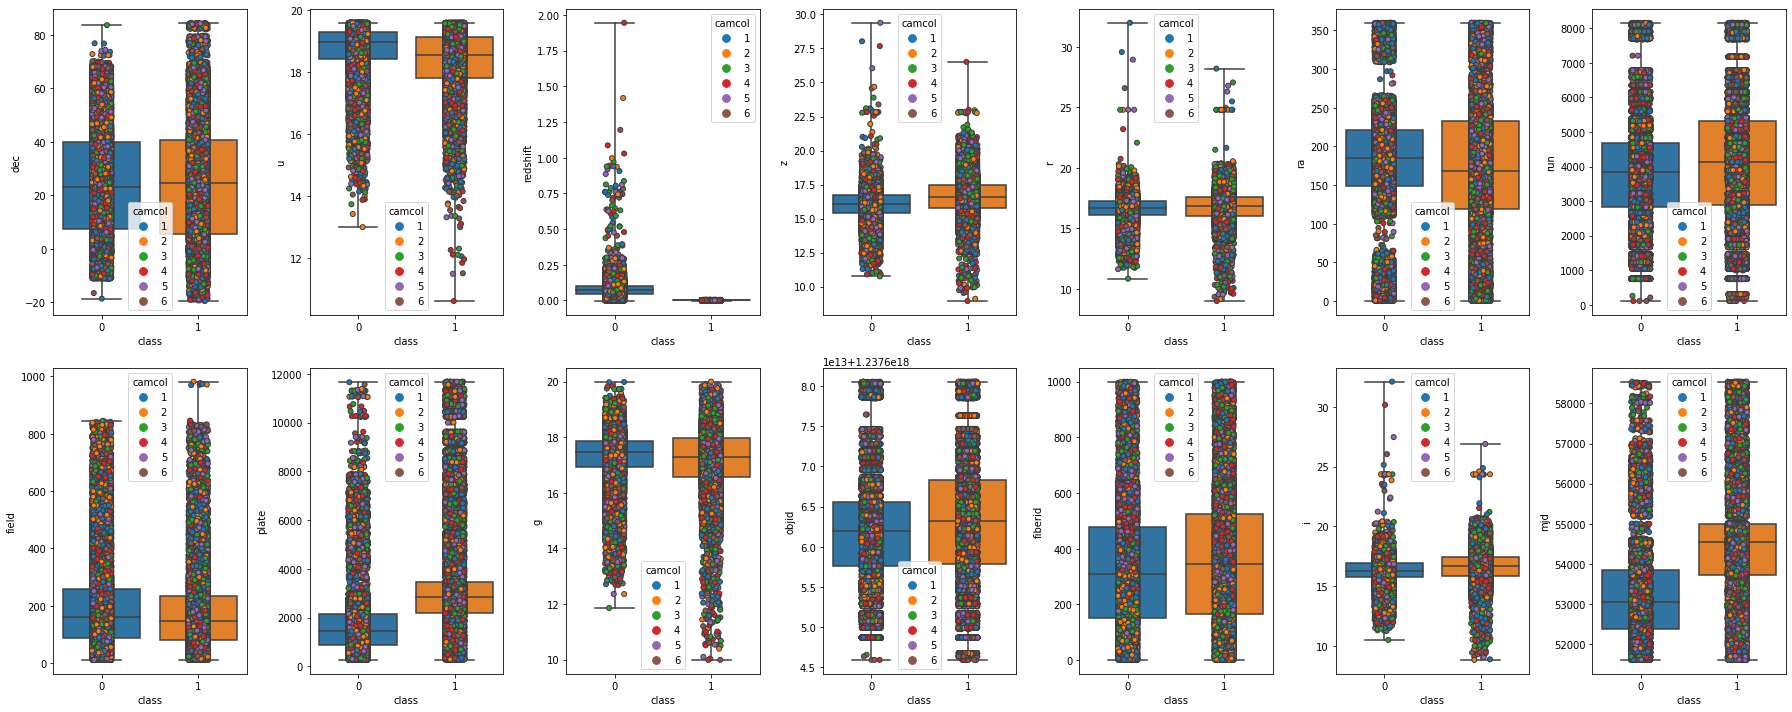

In [ ]:
# Visualizing the data through stripplot and boxplot. Stripplot shows us the data distribuition for each of the numerical features in the dataset and boxplot tells us the medina dn 25th and 75th percentile of each feature.
# Other than the target class, the 'camcol' feature is the one which is distinct and categorical and hence I have used it to see the different outliers for each feature.

# Define the number of rows and columns
n_rows=2
n_cols=7

# Create the subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols,figsize=(25,10))

df_copy = df.copy()
df_copy = df_copy.drop(["class", "camcol"],  axis=1) # Dropping the irredundant categorical features from copy of the dataframe to get the better plots.

for i, column in enumerate(df_copy.columns):
  ax=sns.stripplot(x="class", y=column, linewidth=1, hue="camcol", data=df, ax=axes[i//n_cols,i%n_cols])
  ax=sns.boxplot(x="class", y=column, data=df, whis=np.inf, ax=ax)

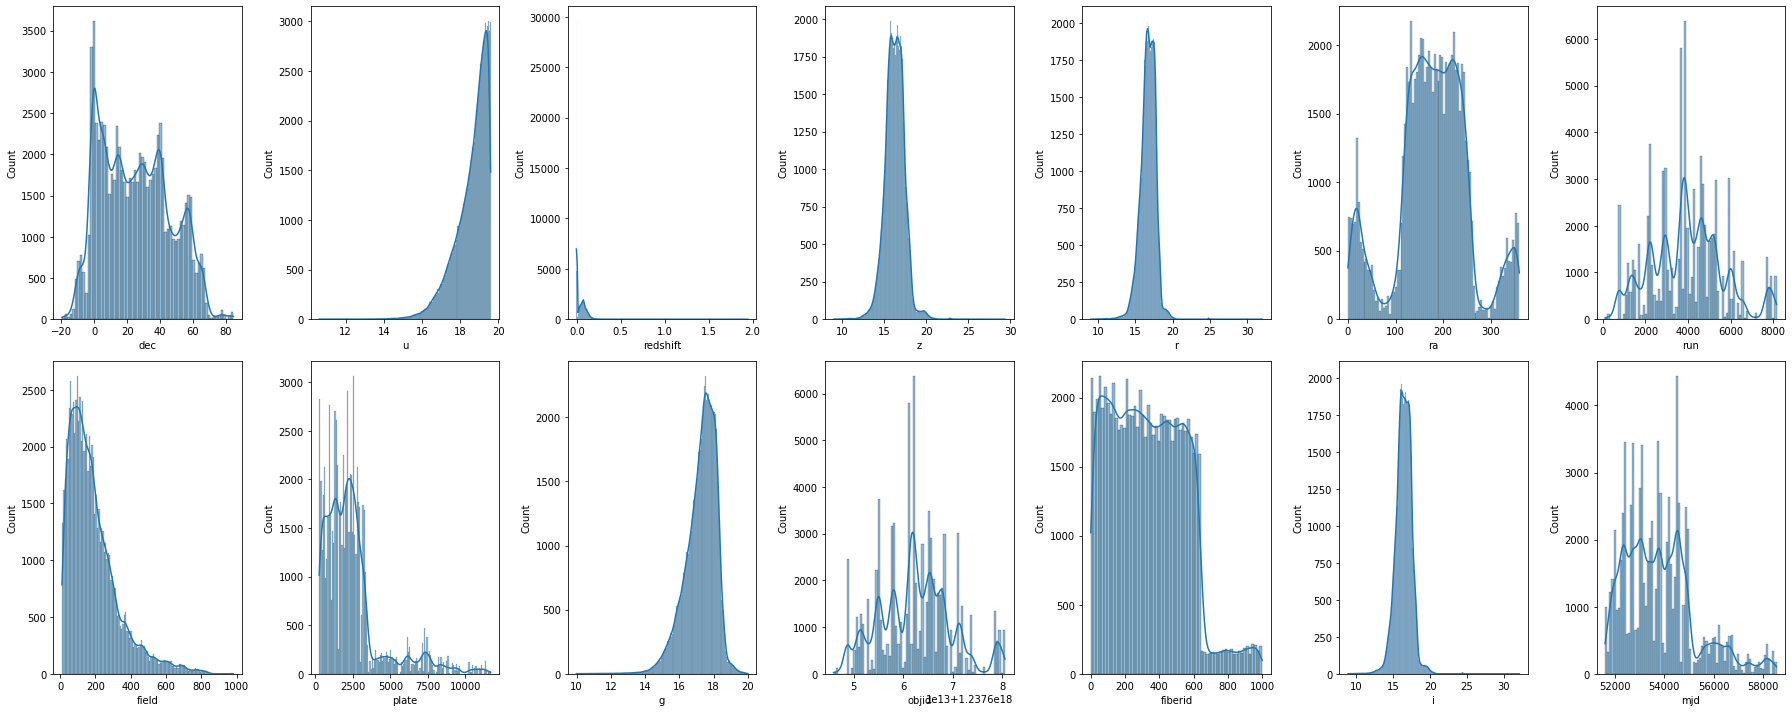

In [ ]:
# Plotting the histograms of each feature to get an idea about how much the data is normal or skewed.
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols,figsize=(25,10))
for i, column in enumerate(df_copy.columns):
  ax=sns.histplot(df_copy[column], kde=True, ax=axes[i//n_cols,i%n_cols])

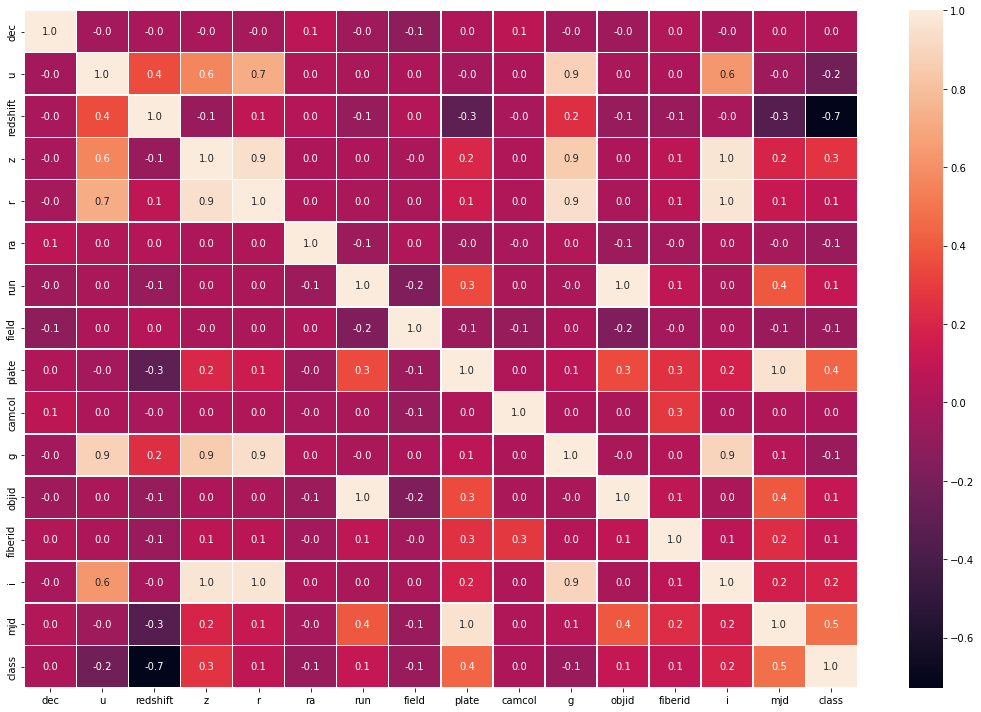

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))         # Sample figsize in inches
sns.heatmap(df.corr(), annot=True, fmt=".1f", linewidths=.5, ax=ax)

Correlation between the target class label and features decides how much correlated each of the features is with respect to the target class label. There are various correlation techniques such as Pearson, Spearman, Kendall, etc to find correlations between two features.

df.corr() returns with the person correlation coefficient between the features.


Correlation between the features results in collinearity, which may affect the performance of the model. A feature is said to be correlated with other features if they have a high coefficient of correlation, hence a change in one feature results in a change of the other correlated feature too.

**From above, we can observe that the target variable 'class' is more dependent on redshift, mjd, spaceobjid and plate.**

Based on the above heatmap, we need to do Feature Selection as there is no use of using all the features for predicitions, mainly which contributes even less than 10 percent. Similarly, features which are highly correleated (like z, i, g and r) can be removed and only one can be kept that contributes highest in class predicition.

There are many ways that can be used to do this like RFE(recursive Feature Elimination) or mutual_info_classif or PCA ( all from scikit learn).

Perhaps the most popular technique for dimensionality reduction in machine learning is Principal Component Analysis, or PCA for short. This is a technique that comes from the field of linear algebra and can be used as a data preparation technique to create a projection of a dataset prior to fitting a model.

 **Feature Selection:**

I am trying different classifiers here to look into the relative importance of different features and to decide the best features.


---



In [24]:
X = df.iloc[ :, :15]
y = df.iloc[ :, -1]

In [25]:
y

0        0
1        1
2        0
3        0
4        1
        ..
79995    0
79996    1
79997    0
79998    1
79999    1
Name: class, Length: 80000, dtype: int64

Feature: 0, Score: 0.00051
Feature: 1, Score: 0.00077
Feature: 2, Score: 0.99517
Feature: 3, Score: 0.00049
Feature: 4, Score: 0.00022
Feature: 5, Score: 0.00084
Feature: 6, Score: 0.00018
Feature: 7, Score: 0.00020
Feature: 8, Score: 0.00030
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00059
Feature: 11, Score: 0.00004
Feature: 12, Score: 0.00037
Feature: 13, Score: 0.00009
Feature: 14, Score: 0.00022


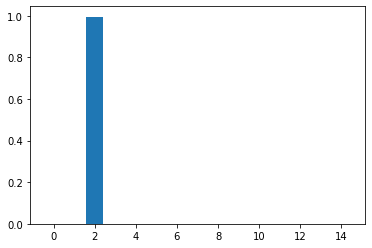

In [26]:
# decision tree for feature importance on a classification problem
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot

# define the model
model = DecisionTreeClassifier()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

Feature: 0, Score: 0.00753
Feature: 1, Score: 0.01846
Feature: 2, Score: 0.65814
Feature: 3, Score: 0.03577
Feature: 4, Score: 0.01504
Feature: 5, Score: 0.02221
Feature: 6, Score: 0.01212
Feature: 7, Score: 0.00243
Feature: 8, Score: 0.10788
Feature: 9, Score: 0.00065
Feature: 10, Score: 0.01054
Feature: 11, Score: 0.01061
Feature: 12, Score: 0.00193
Feature: 13, Score: 0.02563
Feature: 14, Score: 0.07106


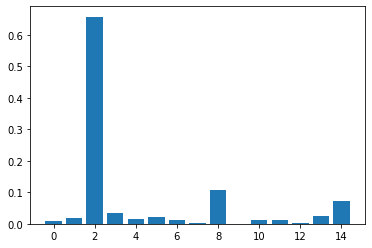

In [27]:
# random forest for feature importance on a classification problem
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot

model = RandomForestClassifier()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

Feature: 0, Score: 0.00164
Feature: 1, Score: 0.00381
Feature: 2, Score: 0.96980
Feature: 3, Score: 0.00369
Feature: 4, Score: 0.00145
Feature: 5, Score: 0.00261
Feature: 6, Score: 0.00161
Feature: 7, Score: 0.00137
Feature: 8, Score: 0.00462
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00184
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.00131
Feature: 13, Score: 0.00177
Feature: 14, Score: 0.00448


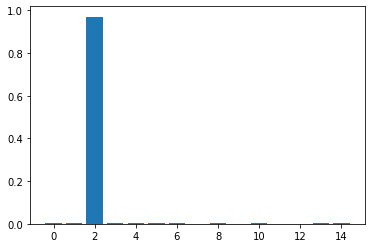

In [28]:
from sklearn.datasets import make_classification
from xgboost import XGBClassifier
from matplotlib import pyplot

model = XGBClassifier()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

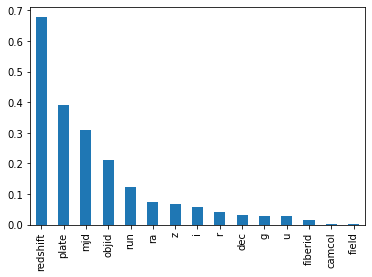

In [29]:
# mutual_info_classif from scikit learn
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import StandardScaler

mi = mutual_info_classif(X, y)
mi_series = pd.Series(mi)
mi_series.index = X.columns

mi_series.sort_values(ascending = False).plot.bar()

[1.00000000e+00 9.98128823e-20 2.16677820e-21 8.12529759e-22
 3.74747450e-22 1.15462529e-22 8.05939964e-24 8.46264801e-26
 4.68206480e-26 8.56577262e-27 6.63227773e-28 4.83492547e-28
 2.31744600e-28 3.13092320e-29 8.67722270e-39] 



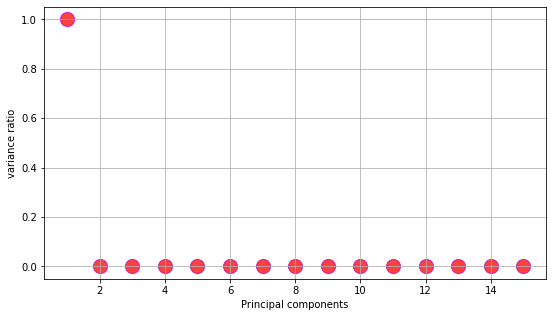

In [30]:
# PCA from sklearn
from sklearn.decomposition import PCA

pca = PCA(n_components=None)
dfx_pca = pca.fit(X)

print(dfx_pca.explained_variance_ratio_,"\n")

plt.figure(figsize=(9,5))
plt.scatter(x=[i+1 for i in range(len(dfx_pca.explained_variance_ratio_))],
            y=dfx_pca.explained_variance_ratio_,
            s=200,
            alpha=0.75,
            c='red',
            edgecolor='m')
plt.grid(True)
plt.xlabel("Principal components")
plt.ylabel("variance ratio")
plt.show()

*   **In all the visualizations done above, we can observe that 'redshift' feature alone is contributing most towards the predicitions. We will try to move with this only and see what evaluation metrics we get for different models.**



In [31]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [32]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
# X = df.drop('class', axis=1)
# y = df["class"]

# X = df.drop(['class','r','z','i','specobjid'], axis=1)
# y = df["class"]

# X = df["field"]
# y = df["class"]

X = df["redshift"]
y = df["class"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [33]:
X_train.head()

26115    0.026995
37334   -0.000104
30532    0.127690
67746   -0.000188
48308   -0.000776
Name: redshift, dtype: float64

In [34]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# sc = StandardScaler()
sc = MinMaxScaler()

X_train = np.array(X_train).reshape(-1, 1)
X_test = np.array(X_test).reshape(-1, 1)

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Few things below I had tried before attaing the final accuracy. You can uncomment and check the results. 

In [ ]:
# import sklearn.preprocessing as preprocessing
# min_max_scaler = preprocessing.MinMaxScaler()
# sc = preprocessing.StandardScaler()

# # If you keep the numeric values standardized and the categorical variables as they are , 
# # then they could cause a large variance in the vector. 
# # Another option is to standardize the numeric values and normalize the categorical values.

# for c in X_train.columns:
#   float_array_train = X_train[c].values.astype(float).reshape(-1,1)
#   float_array_test = X_test[c].values.astype(float).reshape(-1,1)
#   if c in ['camcol','fiberid', 'objid' ]:
#       scaled_array_train = min_max_scaler.fit_transform(float_array_train)
#       scaled_array_test = min_max_scaler.transform(float_array_test)
#   else:
#       scaled_array_train = sc.fit_transform(float_array_train)
#       scaled_array_test = sc.transform(float_array_test)

#   X_train[c] = scaled_array_train
#   X_test[c] = scaled_array_test


In [ ]:
# explained_variance = pca.explained_variance_ratio_

In [ ]:
# from sklearn.decomposition import PCA

# pca = PCA(n_components=5)
# X_train = pca.fit_transform(X_train)
# X_test = pca.transform(X_test)

# **Training & Evaluation:**

**Neural Network** using Keras with sigmoid for binary dataset:

---



In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(4, activation='relu', input_shape=[1]),
    layers.Dense(4, activation='relu'),    
    layers.Dense(1, activation='sigmoid'),
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['binary_accuracy'],
)

early_stopping = keras.callbacks.EarlyStopping(
    patience=10,
    min_delta=0.001,
    restore_best_weights=True,
)

history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=512,
    epochs=1000,
    callbacks=[early_stopping],
    verbose=0, # hide the output because we have so many epochs
)

Best Validation Loss: 0.0259
Best Validation Accuracy: 0.9946


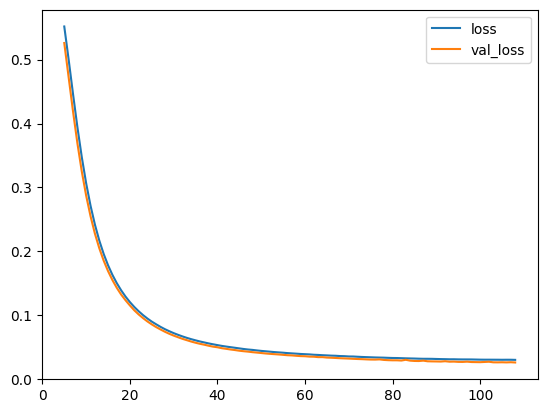

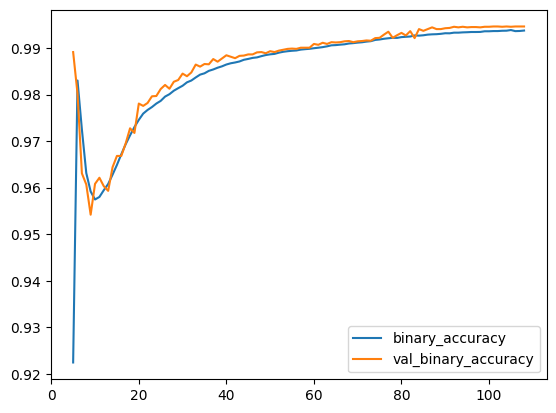

In [ ]:
history_df = pd.DataFrame(history.history)
# Start the plot at epoch 5
history_df.loc[5:, ['loss', 'val_loss']].plot()
history_df.loc[5:, ['binary_accuracy', 'val_binary_accuracy']].plot()

print(("Best Validation Loss: {:0.4f}" +\
      "\nBest Validation Accuracy: {:0.4f}")\
      .format(history_df['val_loss'].min(), 
              history_df['val_binary_accuracy'].max()))

Text(113.92222222222226, 0.5, 'Actual label')

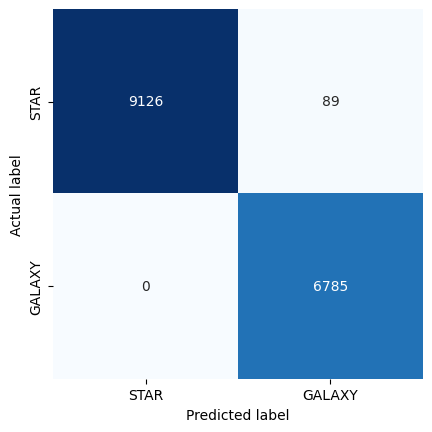

In [ ]:
from sklearn.metrics import confusion_matrix

y_predicted = model.predict(X_test) > 0.5
mat = confusion_matrix(y_test, y_predicted)
labels = ['STAR', 'GALAXY']

sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, cmap='Blues',
            xticklabels=labels, yticklabels=labels)

plt.xlabel('Predicted label')
plt.ylabel('Actual label')



*   **The result is mostly true as we can see it has biggest numbers in True Positive and True Negative cells of the confusion matrix.**

**Scikit-learn** models:

---



In [ ]:
# from sklearn.ensemble import RandomForestClassifier

# classifier = RandomForestClassifier(max_depth=2, random_state=0)
# classifier.fit(X_train, y_train)

# # Predicting the Test set results
# y_pred = classifier.predict(X_test)

In [ ]:
# from sklearn.metrics import confusion_matrix
# from sklearn.metrics import accuracy_score

# cm = confusion_matrix(y_test, y_pred)
# print(cm)
# print('Accuracy', accuracy_score(y_test, y_pred))

In [35]:
models = {}

# Logistic Regression
from sklearn.linear_model import LogisticRegression
models['Logistic Regression'] = LogisticRegression()

# Support Vector Machines
from sklearn.svm import LinearSVC
models['Support Vector Machines'] = LinearSVC()

# Decision Trees
from sklearn.tree import DecisionTreeClassifier
models['Decision Trees'] = DecisionTreeClassifier()

# Random Forest
from sklearn.ensemble import RandomForestClassifier
models['Random Forest'] = RandomForestClassifier()

# Naive Bayes
from sklearn.naive_bayes import GaussianNB
models['Naive Bayes'] = GaussianNB()

# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
models['K-Nearest Neighbor'] = KNeighborsClassifier()
from sklearn.metrics import accuracy_score, precision_score, recall_score

accuracy, precision, recall = {}, {}, {}

for key in models.keys():
    
    # Fit the classifier model
    models[key].fit(X_train, y_train)
    
    # Prediction 
    predictions = models[key].predict(X_test)
    
    # Calculate Accuracy, Precision and Recall Metrics
    accuracy[key] = accuracy_score(predictions, y_test)
    precision[key] = precision_score(predictions, y_test)
    recall[key] = recall_score(predictions, y_test)

In [36]:
df_model = pd.DataFrame(index=models.keys(), columns=['Accuracy', 'Precision', 'Recall'])
df_model['Accuracy'] = accuracy.values()
df_model['Precision'] = precision.values()
df_model['Recall'] = recall.values()

df_model

,Accuracy,Precision,Recall
Logistic Regression,0.966125,1.000000,0.926027
Support Vector Machines,0.983812,1.000000,0.963231
Decision Trees,0.995812,0.991746,0.998368
Random Forest,0.998000,0.996905,0.998376
Naive Bayes,0.993687,0.994694,0.990461
K-Nearest Neighbor,0.998875,0.998674,0.998674


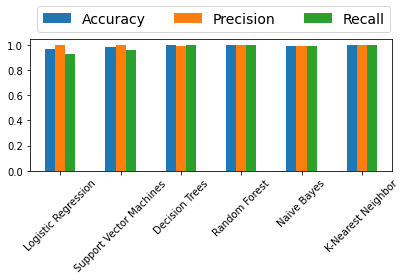

In [37]:
ax  = df_model.plot.bar(rot=45)
ax.legend(ncol= len(models.keys()), bbox_to_anchor=(0, 1), loc='lower left', prop={'size': 14})
plt.tight_layout()

* **So, finally with all the confusion matrix and accuracy, we have achieved very good results considering only one feature.**